In [ ]:
#Task no.2 Creteing K means clustring

In [17]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [18]:
# importing datasets
df=pd.read_csv('Mall_Customers.csv')

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [22]:
df.drop(["CustomerID"], axis = 1, inplace=True)

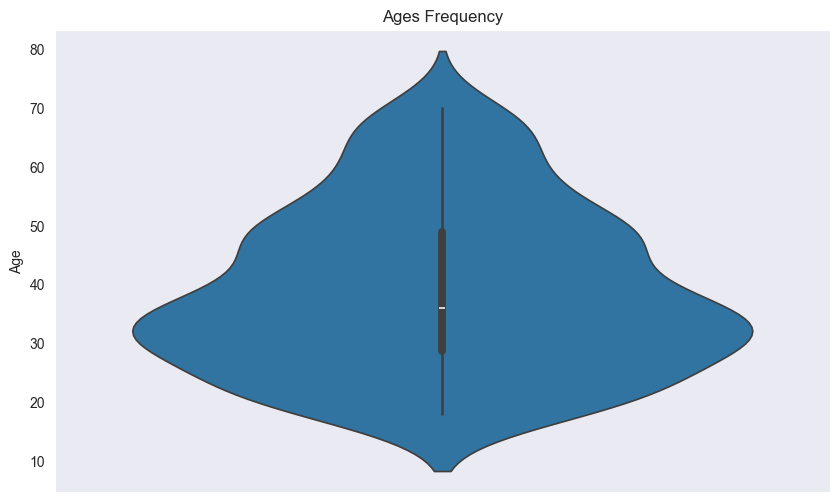

In [23]:
plt.figure(figsize=(10, 6))
plt.title("Ages Frequency")
sns.set_style("dark")
sns.violinplot(y=df["Age"]) 
plt.show()

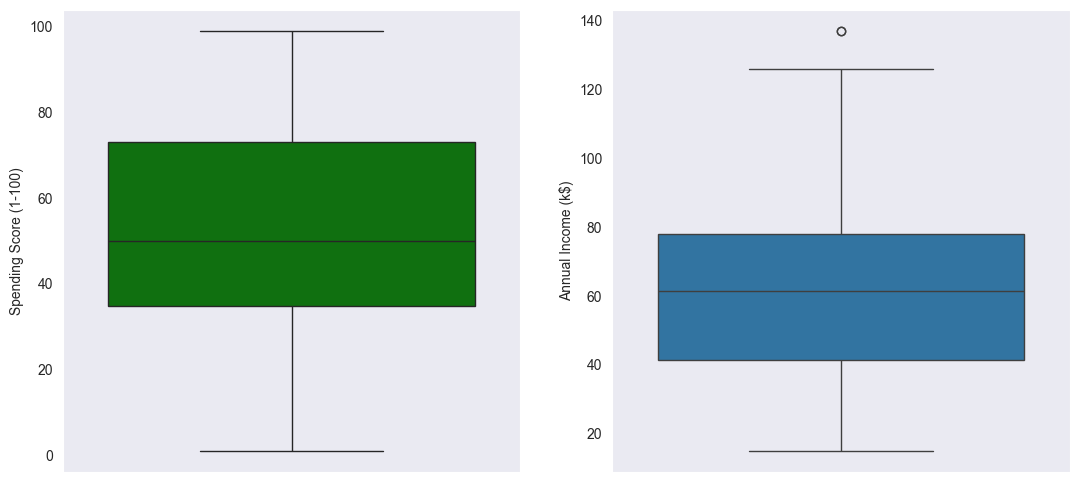

In [32]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="green")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

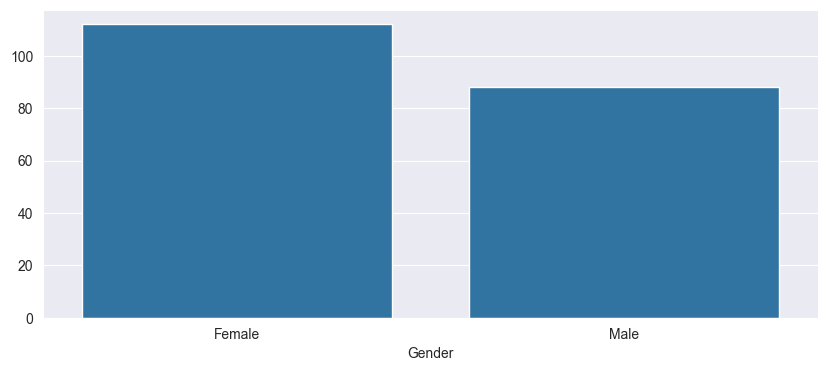

In [33]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

C:\Users\Win-10\AppData\Local\Temp\ipykernel_13240\575905290.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket")


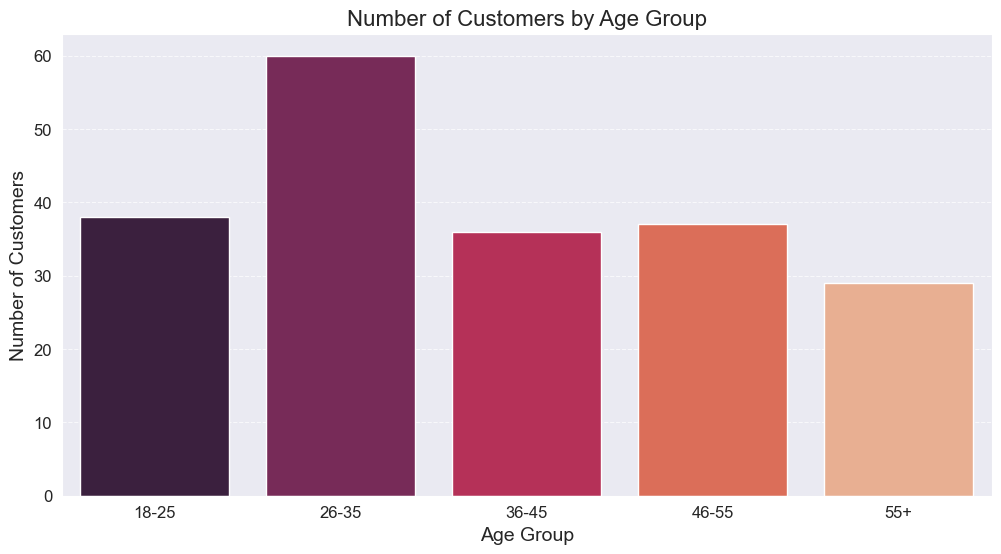

In [34]:
# Age groups
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

# Define age group labels and counts
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25), len(age26_35), len(age36_45), len(age46_55), len(age55above)]

# Plot the age distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customers by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Win-10\AppData\Local\Temp\ipykernel_13240\3452366886.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")


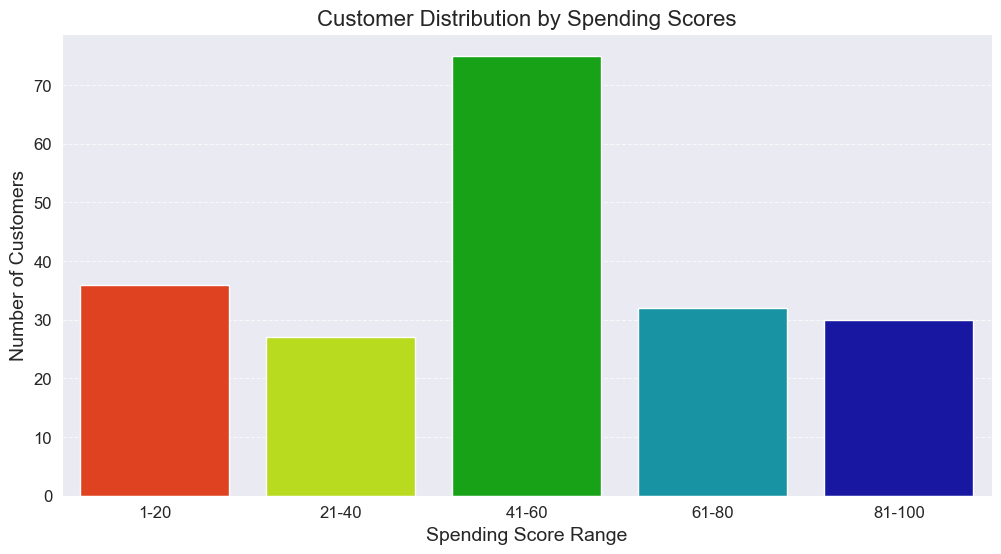

In [35]:
# Spending Score groups
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

# Define spending score groups and counts
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20), len(ss21_40), len(ss41_60), len(ss61_80), len(ss81_100)]

# Plotting the spending scores distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Customer Distribution by Spending Scores", fontsize=16)
plt.xlabel("Spending Score Range", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

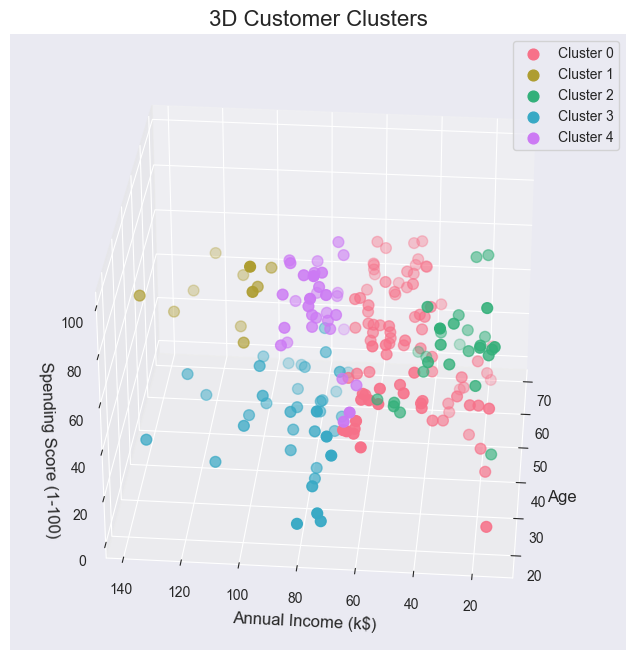

In [36]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Performing KMeans clustering
km = KMeans(n_clusters=5, random_state=42)
clusters = km.fit_predict(df.iloc[:, 1:])  # Exclude 'CustomerID' for clustering
df["label"] = clusters

# Createing a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Defining color palette
colors = sns.color_palette("husl", 5)  # Use a color palette for better visuals

# Plotting each cluster dynamically
for label, color in enumerate(colors):
    ax.scatter(
        df.Age[df.label == label],
        df["Annual Income (k$)"][df.label == label],
        df["Spending Score (1-100)"][df.label == label],
        color=color,
        s=60,
        label=f"Cluster {label}"
    )

# Setting plot properties
ax.view_init(30, 185)  # Adjust the viewing angle
ax.set_title("3D Customer Clusters", fontsize=16)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Annual Income (k$)", fontsize=12)
ax.set_zlabel("Spending Score (1-100)", fontsize=12)
ax.legend(loc='best', fontsize=10)
plt.show()
